In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [4]:
train_set = pd.read_csv('./Dataset/NSL_KDD_Train.csv', header=None, names = col_names)
test_set = pd.read_csv('./Dataset/NSL_KDD_Test.csv',header=None, names = col_names)

In [8]:
print('Dimensions of the Training set:',train_set.shape)
print('Dimensions of the Test set:',test_set.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [5]:
train_set_label = train_set['label']

newlabeldf=train_set_label.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

train_set['label'] = newlabeldf

In [6]:
test_set_label = test_set['label']
newlabeldf_test= test_set_label.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

test_set['label'] = newlabeldf_test

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
categorical_columns=['protocol_type', 'service', 'flag']

train_categorical_values = train_set[categorical_columns]
test_categorical_values = test_set[categorical_columns]
train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [12]:
# protocol type
unique_protocol=sorted(train_set.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol_train=[string1 + x for x in unique_protocol]
print(unique_protocol_train)

# service
unique_service=sorted(train_set.service.unique())
string2 = 'service_'
unique_service_train=[string2 + x for x in unique_service]
print(unique_service_train)


# flag
unique_flag=sorted(train_set.flag.unique())
string3 = 'flag_'
unique_flag_train=[string3 + x for x in unique_flag]
print(unique_flag_train)


# put together
dumcols_train=unique_protocol_train + unique_service_train + unique_flag_train


#do it for test set
unique_service_test=sorted(test_set.service.unique())
unique_service_test=[string2 + x for x in unique_service_test]
dumcols_test=unique_protocol_train + unique_service_test + unique_flag_train

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [13]:
encoder = OneHotEncoder(categories='auto')
train_categorical_values_enc = encoder.fit_transform(train_categorical_values)
train_cat_data = pd.DataFrame(train_categorical_values_enc.toarray(),columns=dumcols_train)


# test set
testdf_categorical_values_enc = encoder.fit_transform(test_categorical_values)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_enc.toarray(),columns=dumcols_test)

train_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
trainservice=train_set['service'].tolist()
testservice= test_set['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_urh_i',
 'service_harvest',
 'service_aol',
 'service_http_8001',
 'service_red_i']

In [15]:
for col in difference:
    testdf_cat_data[col] = 0

print(train_cat_data.shape)
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


In [16]:
newdf_train=train_set.join(train_cat_data)
newdf_train.drop('flag', axis=1, inplace=True)
newdf_train.drop('protocol_type', axis=1, inplace=True)
newdf_train.drop('service', axis=1, inplace=True)

# test data
newdf_test=test_set.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf_train.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [17]:
newdf_train.sort_index(axis=1,inplace=True)
newdf_test.sort_index(axis=1,inplace=True)

3. LSTM

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [20]:
x_train3 = newdf_train
x_train3 = x_train3.drop(['label'], axis=1)
y_train3 = newdf_train['label']

x_test3 = newdf_test
x_test3 = newdf_test.drop(['label'],axis=1)
y_test3 = newdf_test['label']

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)

In [23]:
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [24]:
x_train_seq, y_train_seq = create_sequences(x_train3, y_train3, 30)

In [25]:
print(x_train_seq.shape)
print(y_train_seq.shape)

(125943, 30, 122)
(125943,)


In [26]:
x_test_seq, y_test_seq = create_sequences(x_test3, y_test3, 30)

In [27]:
print(x_test_seq.shape)
print(y_test_seq.shape)

(22514, 30, 122)
(22514,)


In [28]:
model_LSTM = Sequential()

model_LSTM.add(LSTM(units = 128,activation='relu', return_sequences=True, input_shape = (x_train_seq.shape[1],x_train_seq.shape[2])))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(units = 64,activation='relu',return_sequences=True))
model_LSTM.add(Dropout(0.3))

model_LSTM.add(LSTM(units = 32,activation='relu',return_sequences=True))
model_LSTM.add(Dropout(0.4))

model_LSTM.add(LSTM(units = 64,activation='relu',return_sequences=True))
model_LSTM.add(Dropout(0.5))

model_LSTM.add(LSTM(units = 128,activation='relu'))
model_LSTM.add(Dropout(0.6))

model_LSTM.add(Dense(units = 5,activation='softmax'))

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │       128,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 943,889 (3.60 MB)

 Trainable params: 314,629 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 629,260 (2.40 MB)

In [29]:
model_LSTM.compile(optimizer = Adam(learning_rate = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

In [31]:
LSTM_history = model_LSTM.fit(x_train_seq,y_train_seq, validation_data = (x_test_seq, y_test_seq), epochs = 100,batch_size=16, callbacks = [early_stopping],verbose = 1, shuffle = True)

Epoch 1/100
7872/7872 ━━━━━━━━━━━━━━━━━━━━ 430s 53ms/step - accuracy: 0.5287 - loss: 0.9893 - val_accuracy: 0.4307 - val_loss: 1.4890
Epoch 2/100
7872/7872 ━━━━━━━━━━━━━━━━━━━━ 426s 54ms/step - accuracy: 0.5335 - loss: 0.9691 - val_accuracy: 0.4307 - val_loss: 1.4624
Epoch 3/100
7872/7872 ━━━━━━━━━━━━━━━━━━━━ 448s 57ms/step - accuracy: 0.5349 - loss: 0.9679 - val_accuracy: 0.4307 - val_loss: 1.5188
Epoch 4/100
7872/7872 ━━━━━━━━━━━━━━━━━━━━ 458s 58ms/step - accuracy: 0.5341 - loss: 0.9647 - val_accuracy: 0.4307 - val_loss: 1.4638
Epoch 5/100
7872/7872 ━━━━━━━━━━━━━━━━━━━━ 483s 61ms/step - accuracy: 0.5343 - loss: 0.9666 - val_accuracy: 0.4307 - val_loss: 1.5185
Epoch 6/100
7872/7872 ━━━━━━━━━━━━━━━━━━━━ 480s 61ms/step - accuracy: 0.5352 - loss: 0.9638 - val_accuracy: 0.4307 - val_loss: 1.5126
Epoch 7/100
7872/7872 ━━━━━━━━━━━━━━━━━━━━ 457s 58ms/step - accuracy: 0.5365 - loss: 0.9646 - val_accuracy: 0.4307 - val_loss: 1.5046


In [33]:
loss, accuracy = model_LSTM.evaluate(x_test_seq, y_test_seq)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4305 - loss: 1.4502
Test Loss: 1.4624114036560059, Test Accuracy: 0.43066537380218506


In [34]:
predictions = model_LSTM.predict(x_test_seq)
predicted_classes = np.argmax(predictions, axis=1)

704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step


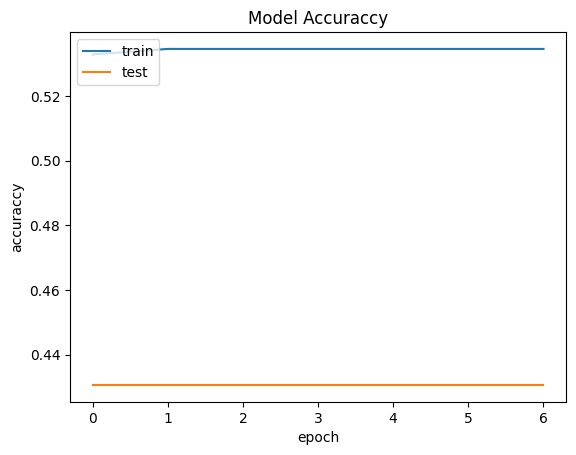

In [35]:
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title("Model Accuraccy")
plt.ylabel('accuraccy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

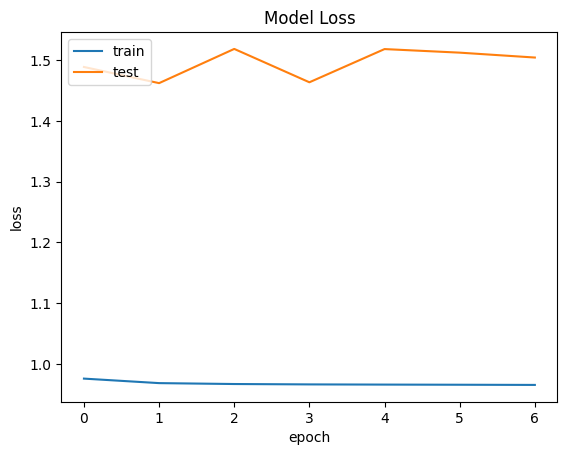

In [36]:
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.43      1.00      0.60      9696
           1       0.00      0.00      0.00      7451
           2       0.00      0.00      0.00      2417
           3       0.00      0.00      0.00      2883
           4       0.00      0.00      0.00        67

    accuracy                           0.43     22514
   macro avg       0.09      0.20      0.12     22514
weighted avg       0.19      0.43      0.26     22514

Confusion Matrix:
[[9696    0    0    0    0]
 [7451    0    0    0    0]
 [2417    0    0    0    0]
 [2883    0    0    0    0]
 [  67    0    0    0    0]]


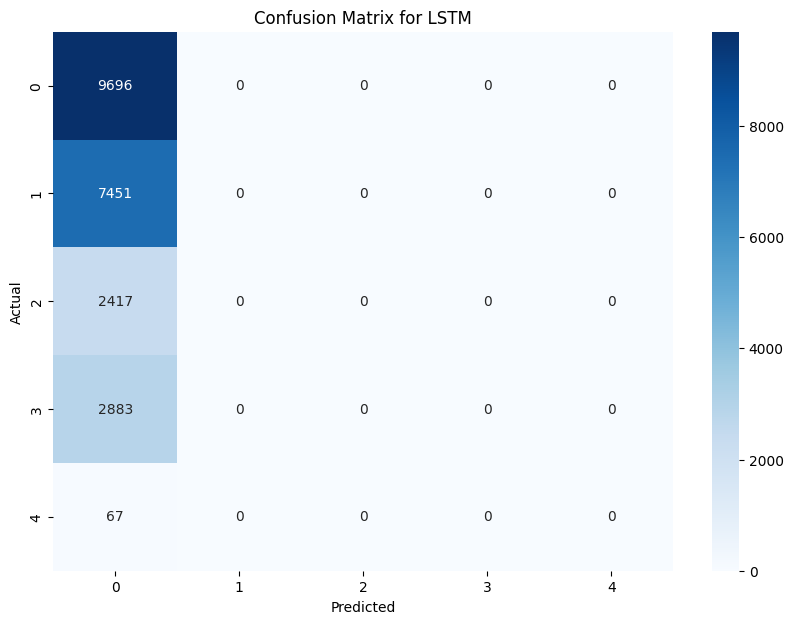

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate a classification report
print(classification_report(y_test_seq, predicted_classes))

# Optional: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_seq, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_seq), 
            yticklabels=np.unique(y_test_seq))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for LSTM')
plt.show()

In [38]:
model_LSTM.save('model_LSTM.h5')